In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
RED = [1,0,0]
GREEN = [0,1,0]
BLUE = [0,0,1]
BLACK = [0,0,0]

In [ ]:
def rand_in_range(low, high):
    """Return a random number in the range [low, high)."""
    return np.random.rand()*(high-low)+low

In [ ]:
def coords(pt_list):
    """
    Given a list of N-dimensional np.array's,
      return N lists, each of which contain one coordinate
      of every np.array
    """
    return tuple( [pt[a] for pt in pt_list] for a in range(pt_list[0].size))

# Roses and Dahlias

In [ ]:
np.random.seed(160518) # set seed for reproducibility
roses = [np.array([np.random.randint(7,20), rand_in_range(0,4), rand_in_range(3,7)]) for ii in range(100)]
dahlias = [np.array([np.random.randint(3,15), rand_in_range(2,8), rand_in_range(2,5)]) for ii in range(100)]

In [ ]:
def plane(arr):
    """
    Separating plane
    """
    mx = 0.5
    my = 0.333
    b = -3
    return mx*arr[0] + my*arr[1] + b

def planediff(arr):
    """
    Returns the difference in the y-value of arr
      and the y-value of the plane.
    """
    return arr[2] - plane(arr[0:2])

In [ ]:
# Coordinates for plotting the plane
p_lin_x = np.arange(0,20,1)
p_lin_y = np.arange(0,8,1)
plx, ply = np.meshgrid(p_lin_x, p_lin_y)
plz = np.array([[plane(np.array([x,y])) for x in p_lin_x] for y in p_lin_y])

In [ ]:
# Manually select all roses below the plane and dahlias above.
# These data won't separate cleanly in 2D, but will in 3D.
rose_p = [pt for pt in roses if (planediff(pt)<0)]
dahl_p = [pt for pt in dahlias if (planediff(pt)>0)]

print(len(rose_p), len(dahl_p))

rose_px, rose_py, rose_pz = coords(rose_p)
dahl_px, dahl_py, dahl_pz = coords(dahl_p)

37 60


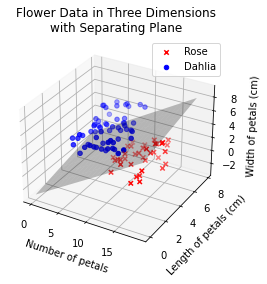

In [ ]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(projection='3d')

scat_rose = ax3.scatter(rose_px, rose_py, rose_pz, color=[1,0,0], marker='x')
scat_dahl = ax3.scatter(dahl_px, dahl_py, dahl_pz, color=[0,0,1], marker='o')
surf_plane = ax3.plot_surface(plx, ply, plz, color=BLACK, alpha=0.25)

ax3.set_xlabel('Number of petals')
ax3.set_ylabel('Length of petals (cm)')
ax3.set_zlabel('Width of petals (cm)')

ax3.legend([scat_rose, scat_dahl], ['Rose', 'Dahlia'])

plt.title('Flower Data in Three Dimensions\nwith Separating Plane')

plt.savefig('Figures/3d_plane.pdf')

this_xlim = ax3.get_xlim()
this_ylim = ax3.get_ylim()
this_zlim = ax3.get_zlim()

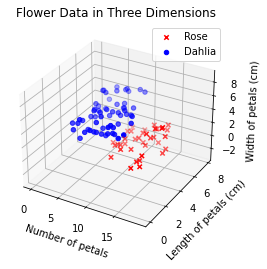

In [ ]:
fig3n = plt.figure()
ax3n = fig3n.add_subplot(projection='3d')

scat_rose = ax3n.scatter(rose_px, rose_py, rose_pz, color=RED, marker='x')
scat_dahl = ax3n.scatter(dahl_px, dahl_py, dahl_pz, color=BLUE, marker='o')

ax3n.set_xlim(this_xlim)
ax3n.set_ylim(this_ylim)
ax3n.set_zlim(this_zlim)

ax3n.set_xlabel('Number of petals')
ax3n.set_ylabel('Length of petals (cm)')
ax3n.set_zlabel('Width of petals (cm)')

ax3n.legend([scat_rose, scat_dahl], ['Rose', 'Dahlia'])

plt.title('Flower Data in Three Dimensions')

plt.savefig('Figures/3d_noplane.pdf')

In [ ]:
def line(x):
    """"
    The separating line in 2D.
    """
    m = 0.5
    b = -3.2
    return m*x+b

def linediff(arr):
    """
    Returns the difference in the y-value of arr
      and the y-value of the line.
    """
    return arr[1] - line(arr[0])

In [ ]:
# Manually select all roses below the line and dahlias above it.
# These data will separate cleanly in 2D.
rose_l = [pt for pt in rose_p if linediff(pt[0:2])<0]
dahl_l = [pt for pt in dahl_p if linediff(pt[0:2])>0]

print(len(rose_l), len(dahl_l))

rose_lx, rose_ly, rose_lz = coords(rose_l)
dahl_lx, dahl_ly, dahl_lz = coords(dahl_l)

34 58


In [ ]:
lin_x = np.array([x/5 for x in range(100)])
lin_y = np.array([line(x) for x in lin_x])

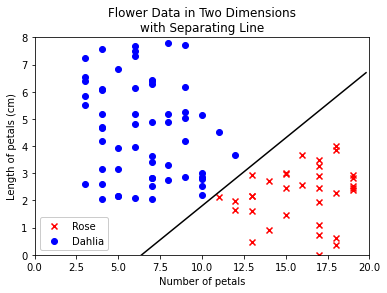

In [ ]:
figl = plt.figure()
axl = figl.add_subplot()
scat_rose = axl.scatter(rose_lx, rose_ly, color=RED, marker='x')
scat_dahl = axl.scatter(dahl_lx, dahl_ly, color=BLUE, marker='o')
axl.plot(lin_x, lin_y, color=BLACK)
axl.set_xlim(0,20)
axl.set_ylim(0,8)
axl.set_xlabel('Number of petals')
axl.set_ylabel('Length of petals (cm)')
axl.legend([scat_rose, scat_dahl], ['Rose', 'Dahlia'], framealpha=1.0)
plt.title('Flower Data in Two Dimensions\nwith Separating Line')

l_xlim = axl.get_xlim()
l_ylim = axl.get_ylim()

plt.savefig('Figures/2d_line.pdf')

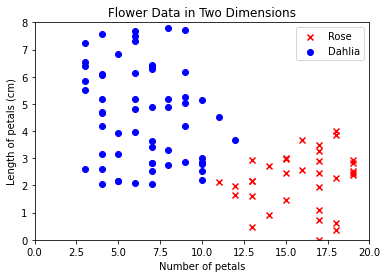

In [ ]:
fignl = plt.figure()
axnl = fignl.add_subplot()
scat_rose = axnl.scatter(rose_lx, rose_ly, color=RED, marker='x')
scat_dahl = axnl.scatter(dahl_lx, dahl_ly, color=BLUE, marker='o')
# ax.plot(lin_x, lin_y, color=BLACK)
axnl.set_xlim(l_xlim)
axnl.set_ylim(l_ylim)
axnl.set_xlabel('Number of petals')
axnl.set_ylabel('Length of petals (cm)')
axnl.legend([scat_rose, scat_dahl], ['Rose', 'Dahlia'])
plt.title('Flower Data in Two Dimensions')

plt.savefig('Figures/2d_noline.pdf')

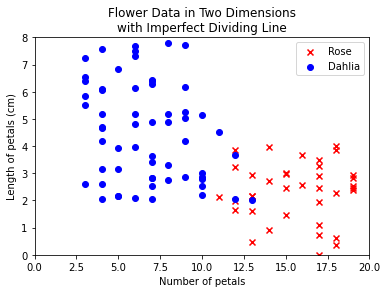

In [ ]:
fig2 = plt.figure()
ax2 = fig2.add_subplot()
scat_rose = ax2.scatter(rose_px, rose_py, color=RED, marker='x')
scat_dahl = ax2.scatter(dahl_px, dahl_py, color=BLUE, marker='o')
# ax2.plot(lin_x, lin_y, color=BLACK)
ax2.set_xlim(l_xlim)
ax2.set_ylim(l_ylim)
ax2.set_xlabel('Number of petals')
ax2.set_ylabel('Length of petals (cm)')
ax2.legend([scat_rose, scat_dahl], ['Rose', 'Dahlia'])
plt.title('Flower Data in Two Dimensions\nwith Imperfect Dividing Line')

# l_xlim = ax.get_xlim()
# l_ylim = ax.get_ylim()

plt.savefig('Figures/3d_line.pdf')

# Kernel Trick

In [ ]:
def rand_k_pt():
    x = 2*np.random.rand()-1
    y = 2*np.random.rand()-1
    z = np.abs(x) + np.abs(y)
    return np.array([x,y,z])

In [ ]:
def plane(arr):
    """
    Separating plane
    """
    mx = 0
    my = 0
    b = 0.8
    return mx*arr[0]+my*arr[1]+b

def planediff(arr):
    """
    Returns the difference in the y-value of arr
      and the y-value of the plane.
    """
    return arr[2] - plane(arr[0:2])
  
# The intersection of the mapping function and the plane
diamond_x = np.array([0.8,0,-0.8,0,0.8])
diamond_y = np.array([0,0.8,0,-0.8,0])

In [ ]:
# data for graphing the plane
linx = np.array(np.arange(-1,1,0.1))
CX, CY = np.meshgrid(linx, linx)
PZ = np.array([[plane(np.array([x,y])) for x in linx] for y in linx])

In [ ]:
np.random.seed(160518) # set the random seed for reproducibility

randk = [rand_k_pt() for x in range(200)]
randkx, randky, randkz = coords(randk)

In [ ]:
randk_up = [pt for pt in randk if planediff(pt)>0]
randk_dn = [pt for pt in randk if planediff(pt)<0]

print(len(randk_up), len(randk_dn))

randk_upx, randk_upy, randk_upz = coords(randk_up)
randk_dnx, randk_dny, randk_dnz = coords(randk_dn)

143 57


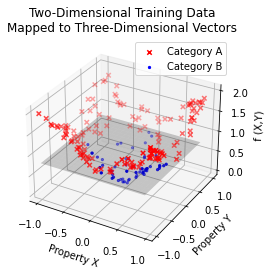

In [ ]:
figk3 = plt.figure()
axk3 = figk3.add_subplot(projection='3d')

scat_ku3 = axk3.scatter(randk_upx, randk_upy, randk_upz, color=RED, marker='x')
scat_kd3 = axk3.scatter(randk_dnx, randk_dny, randk_dnz, color=BLUE, marker='.')
surf_k3 = axk3.plot_surface(CX, CY, PZ, color=BLACK, alpha=0.2)

axk3.set_xlabel('Property X')
axk3.set_ylabel('Property Y')
axk3.set_zlabel('f (X,Y)')

plt.legend([scat_ku3, scat_kd3], ['Category A', 'Category B'])
plt.title('Two-Dimensional Training Data\nMapped to Three-Dimensional Vectors')

plt.savefig('Figures/kern_3d.pdf')

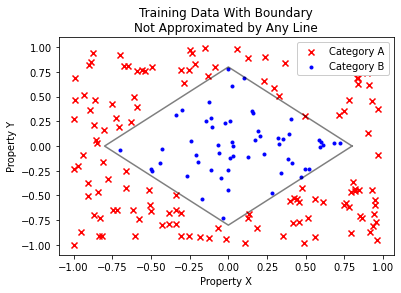

In [ ]:
figk2 = plt.figure()
axk2 = figk2.add_subplot()
scat_ku2 = axk2.scatter(randk_upx, randk_upy, color=RED, marker='x')
scat_kd2 = axk2.scatter(randk_dnx, randk_dny, color=BLUE, marker='.')
plot_diamond = axk2.plot(diamond_x, diamond_y, color=BLACK, alpha=0.5)

axk2.set_xlabel('Property X')
axk2.set_ylabel('Property Y')

plt.legend([scat_ku2, scat_kd2],
 ['Category A', 'Category B'],
  loc='upper right',
  framealpha=1.0)

plt.title('Training Data With Boundary\nNot Approximated by Any Line')

plt.savefig('Figures/kern_2d.pdf')